### Simulating evolution of system state without a controller for the single intersection model

##### Imports

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy import integrate

os.chdir("..")
sys.path.append(os.getcwd())

from models.one_intersection import OneIntersectionSystem

# Set random seed for reproducibility
np.random.seed(0)

#### Setting parameter values and initial conditions

These are dummy values for now, and will have to be tuned.

In [37]:
params = {
    'a': 0.6,
    'b': 0.2,
    'v': 0.005,
    'beta': np.random.random(4)/10,
    'd': 1*np.ones((4,)),
}
initial_state = np.array([2, 2, 2, 2])
initial_state.shape

(4,)

##### Initialising Model and Simulating

In [38]:
# initialising the system
single_intersection = OneIntersectionSystem(params, initial_state)

Initializing OneIntersectionSystem with parameters:
a: 0.6
b: 0.2
v: 0.005
beta: [0.05488135 0.07151894 0.06027634 0.05448832]
d: [1. 1. 1. 1.]
Initial state:
[2 2 2 2]


In [39]:
# ------------------------------------------------------------
# Initialising the State, Sensor,
# Output vectors and the input vector
# ------------------------------------------------------------

N = 60 # Number of minutes to simulate
t0 = 0.0        # [s] Initial time
tf = N*60         # [s] Final time
t= np.linspace(t0,tf,N)

x = np.zeros((4,N))
x[:,0] = initial_state

y = np.zeros((4,N))
y[:,0] = single_intersection.sensor()

z = np.zeros((4,N))
z[:,0] = single_intersection.output() # Only the first two heights are measured

# Start with a constant input
u_const = np.concatenate((np.zeros(30), np.ones(30)))


print(f"Initial state: {x[:, 0]}")
print(f"Initial sensor: {y[:, 0]}")
print(f"Initial output: {z[:, 0]}")
print(f"Initial input: {u_const[0]}")

Sensor measurement: [0.00054881 0.00071519 0.00060276 0.00054488]
Sensor measurement: [0.00054881 0.00071519 0.00060276 0.00054488]
Initial state: [2. 2. 2. 2.]
Initial sensor: [0.00054881 0.00071519 0.00060276 0.00054488]
Initial output: [0.00054881 0.00071519 0.00060276 0.00054488]
Initial input: 0.0


In [40]:
sol = integrate.solve_ivp(single_intersection.process, [t0, tf], initial_state, method='BDF', args=([u_const[0]]))
# Note - args is annoying to work with
sol.t[0], sol.t[-1]

(0.0, 3600.0)

##### Plotting results of deterministic nonlinear simulation

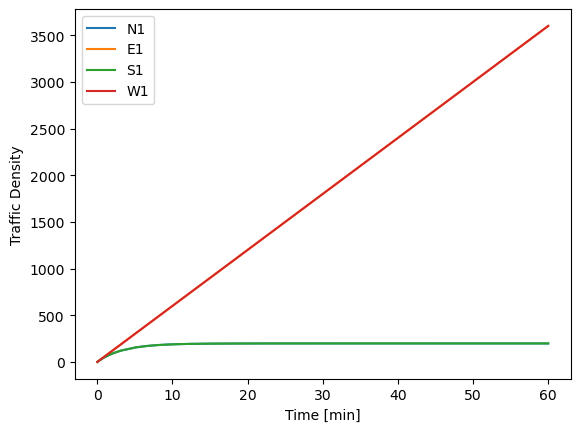

In [41]:
# Traffic denisities
plt.plot(sol.t/60, (sol.y).T)
plt.xlabel('Time [min]')
plt.ylabel('Traffic Density')
plt.legend(['N1', 'E1', 'S1', 'W1'])
plt.show()

# height
# H = np.zeros((4, len(sol.t)))
# for i in range(len(sol.t)):
#     # H[:, i] = (X[:, i])/(rho*A)
#     H[:, i] = fourTankSys.system_sensor(sol.y[:, i])
# plt.plot(sol.t/60, H.T)
# plt.xlabel('Time [min]')
# plt.ylabel('Height [cm]')
# plt.title('Height of liquid in each tank over time')
# plt.legend(['Tank 1', 'Tank 2', 'Tank 3', 'Tank 4'])
# plt.show()

##### Simulating with binary controller (Switching from N-S to E-W every minute)

Transitioning to a discrete-time simulation

In [42]:
u_binary = np.random.randint(2, size=N)

X_d, T_d = np.zeros((4,1)), np.array([0])

for k in range(0, N-1):
    # Now using large arrays for storing historical data
    # y[:, k] = fourTankSys.system_sensor(x[:, k]) 
    # z[:, k] = fourTankSys.system_output(x[:, k])
    sol = integrate.solve_ivp(single_intersection.process, [t[k], t[k+1]], x[:, k], method='BDF', args=([u_const[k]]))
    x[:, k+1] = sol.y[:, -1]
    X_d = np.append(X_d, x[:, k+1].reshape(4,1), axis=1)
    T_d = np.append(T_d, sol.t[-1])
    
k = N-1
# y[:, k] = fourTankSys.system_sensor(x[:, k])
# z[:, k] = fourTankSys.system_output(x[:, k])

Plotting results from discrete-time simulation

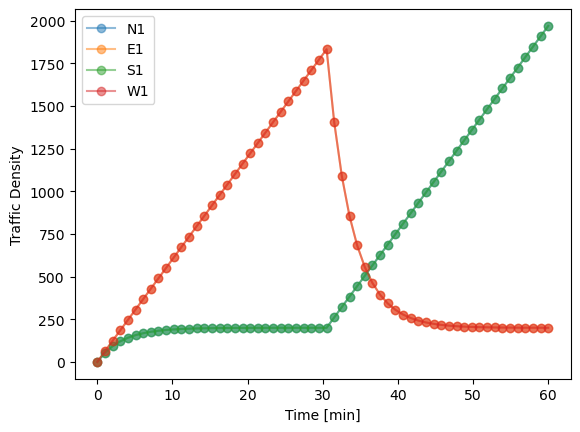

In [43]:
plt.plot(T_d/60, X_d.T, linestyle='-', marker='o', alpha=0.5)
# Marking the controller values 
# plt.plot(T_d/60, u_binary, linestyle='-', marker='o', alpha=0.5)
plt.xlabel('Time [min]')
plt.ylabel('Traffic Density')
plt.legend(['N1', 'E1', 'S1', 'W1', r'$\delta_1$'])
plt.show()

#### Stochastic external flow rate simulation

##### Constant controller value

In [44]:
# Initialise system
single_intersection_stochastic = OneIntersectionSystem(params, initial_state)

# 
x = np.zeros((4,N))
x[:,0] = initial_state
y = np.zeros((4,N))
y[:,0] = single_intersection.sensor()
z = np.zeros((4,N))
z[:,0] = single_intersection.output() 



Initializing OneIntersectionSystem with parameters:
a: 0.6
b: 0.2
v: 0.005
beta: [0.05488135 0.07151894 0.06027634 0.05448832]
d: [1. 1. 1. 1.]
Initial state:
[2 2 2 2]
Sensor measurement: [0.54043532 0.07160971 0.59356159 0.05455748]
Sensor measurement: [0.54043532 0.07160971 0.59356159 0.05455748]
